# Principal Component Analysis (PCA) Basics
- focuses on dimension reduction
- understand which features describe the most variance in the data set
- aids human understanding of large feature sets, especially through visualisation
- they create new dimensional componenets that are combinations of proportions of existing features
- PCA = reducing number of dimensions in data (traansformation)
    - show what features explain the most variance in the data
    allows ML algorthms to run better because we are reducing n features through a transformation (does not select a sub-section)
- variance: features with higher variance vary results more.
- features with more dispersion naturally have more variance.
- we trade off some of the explained variance for less dimensions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('../DATA/cancer_tumor_data_features.csv')

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:>

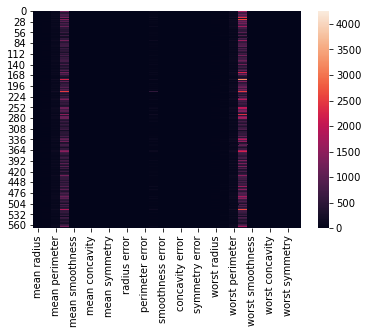

In [4]:
sns.heatmap(df)

In [5]:
# PCA...
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaled_X = scaler.fit_transform(df)

In [10]:
scaled_X.mean(axis=0)

array([-1.37363271e-16,  6.86816353e-17, -1.24875700e-16, -2.18532476e-16,
       -8.36667193e-16,  1.87313551e-16,  4.99502802e-17, -4.99502802e-17,
        1.74825981e-16,  4.74527662e-16,  2.37263831e-16, -1.12388130e-16,
       -1.12388130e-16, -1.31119486e-16, -1.52972733e-16,  1.74825981e-16,
        1.62338411e-16,  0.00000000e+00,  8.74129903e-17, -6.24378502e-18,
       -8.24179623e-16,  1.24875700e-17, -3.74627101e-16,  0.00000000e+00,
       -2.37263831e-16, -3.37164391e-16,  7.49254203e-17,  2.24776261e-16,
        2.62238971e-16, -5.74428222e-16])

In [11]:
# Co variance matrix
covariance_matrix = np.cov(scaled_X, rowvar=False)

In [12]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [14]:
eigen_values # Set of values for each feature

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [17]:
eigen_vectors.shape

(30, 30)

In [18]:
# PCA N features to N PC space
# How many PC to choose? N = 2

In [19]:
num_components = 2

In [20]:
np.argsort([2, 1, 3]) # Get index locations that would have sorted the array

array([1, 0, 2], dtype=int64)

In [25]:
sorted_key = np.argsort(eigen_values)[::-1][:num_components] # Sort everything and return indexes (and reverse it)

In [26]:
sorted_key

array([0, 1], dtype=int64)

In [27]:
# Top two features now
eigen_value, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key] # Get top two values and vectors

In [28]:
# Project original data onto eigen vectors
principal_componenets = np.dot(scaled_X, eigen_vectors)

In [29]:
principal_componenets

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

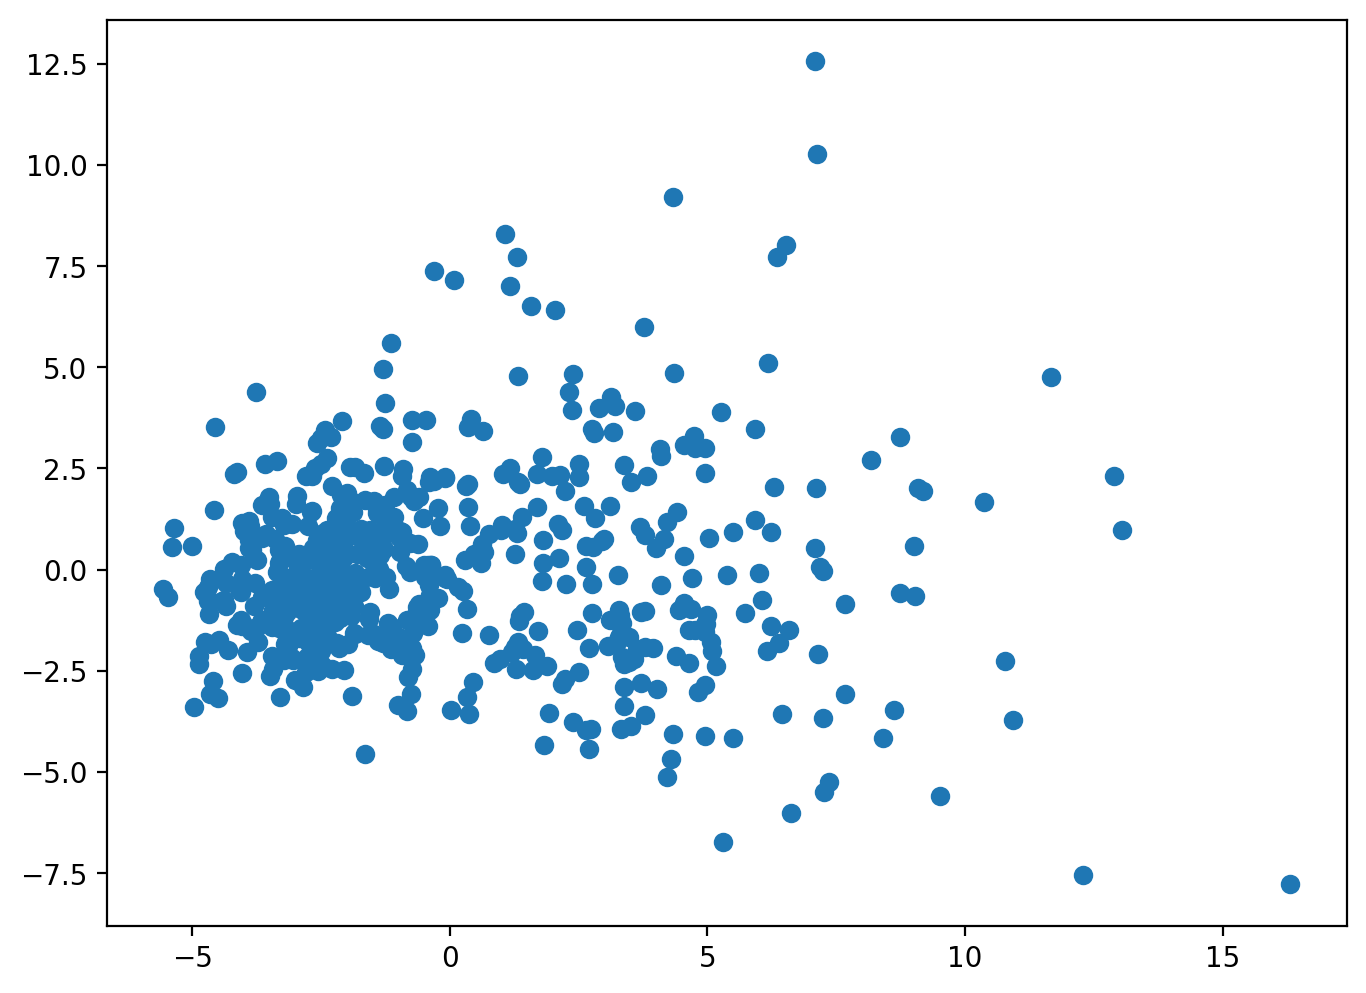

In [31]:
plt.figure(figsize=(8, 6), dpi=200)
plt.scatter(principal_componenets[:, 0], principal_componenets[:, 1])

In [32]:
from sklearn.datasets import load_breast_cancer

In [35]:
cancer_dict = load_breast_cancer()

In [39]:
print(cancer_dict.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [40]:
# Does the data still make sense

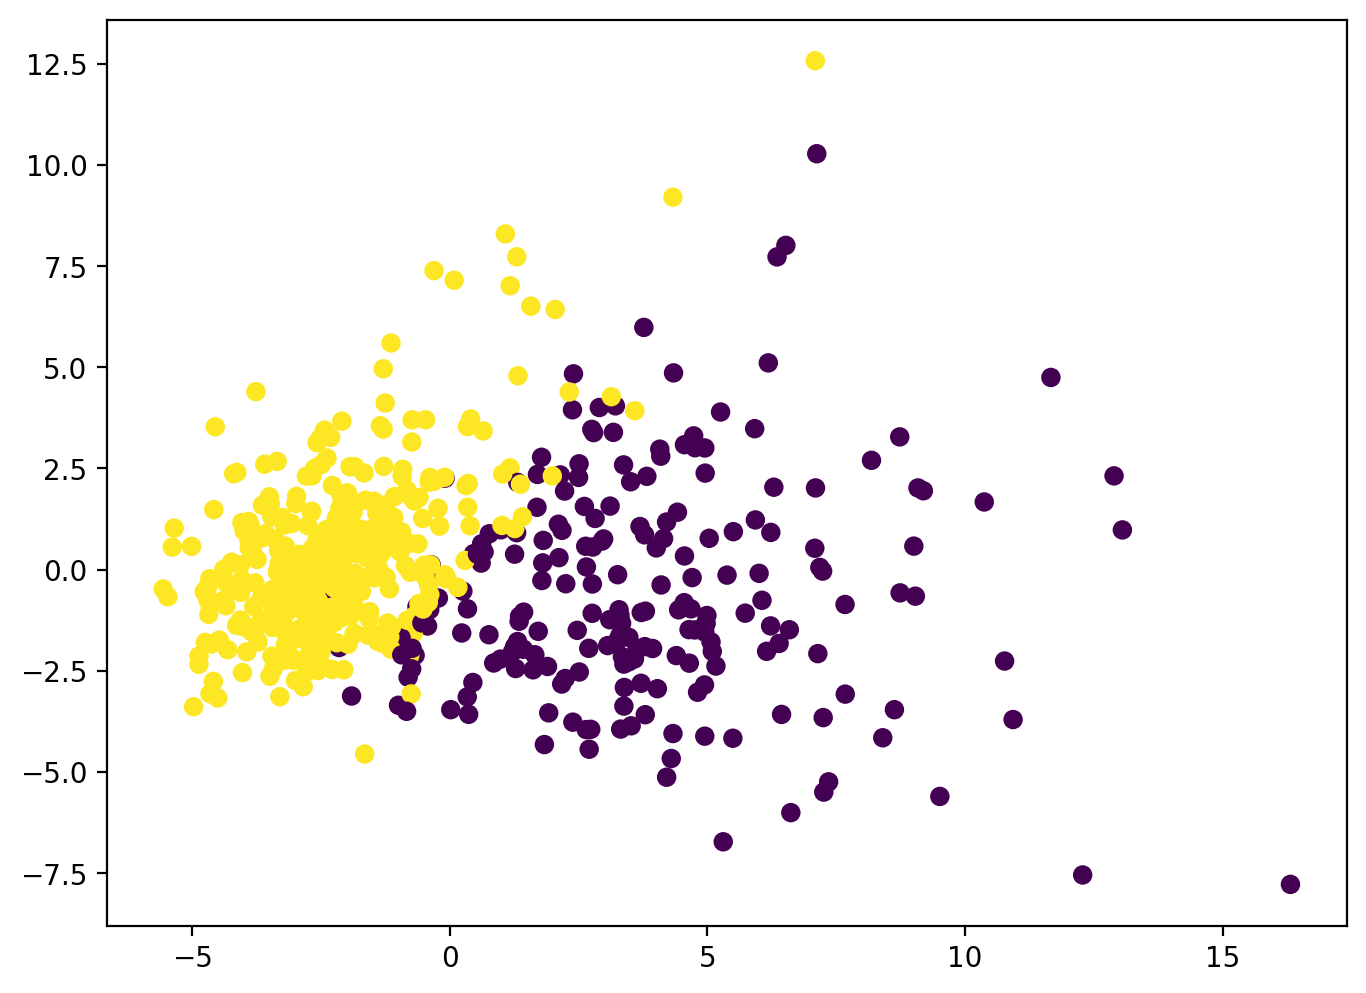

In [42]:
# We have reduced a dataset from 30 features to 2 principal components
plt.figure(figsize=(8, 6), dpi=200)
plt.scatter(principal_componenets[:, 0], principal_componenets[:, 1], c=cancer_dict.target)

# But now with Scikit Learn

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [46]:
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [47]:
from sklearn.decomposition import PCA # decomp from large feature space to a smaller one!

In [48]:
pca_model = PCA(n_components=2)

In [51]:
pc_results = pca_model.fit_transform(scaled_X) # fit calculates the eigen stuff and transform does the projection to two principal components

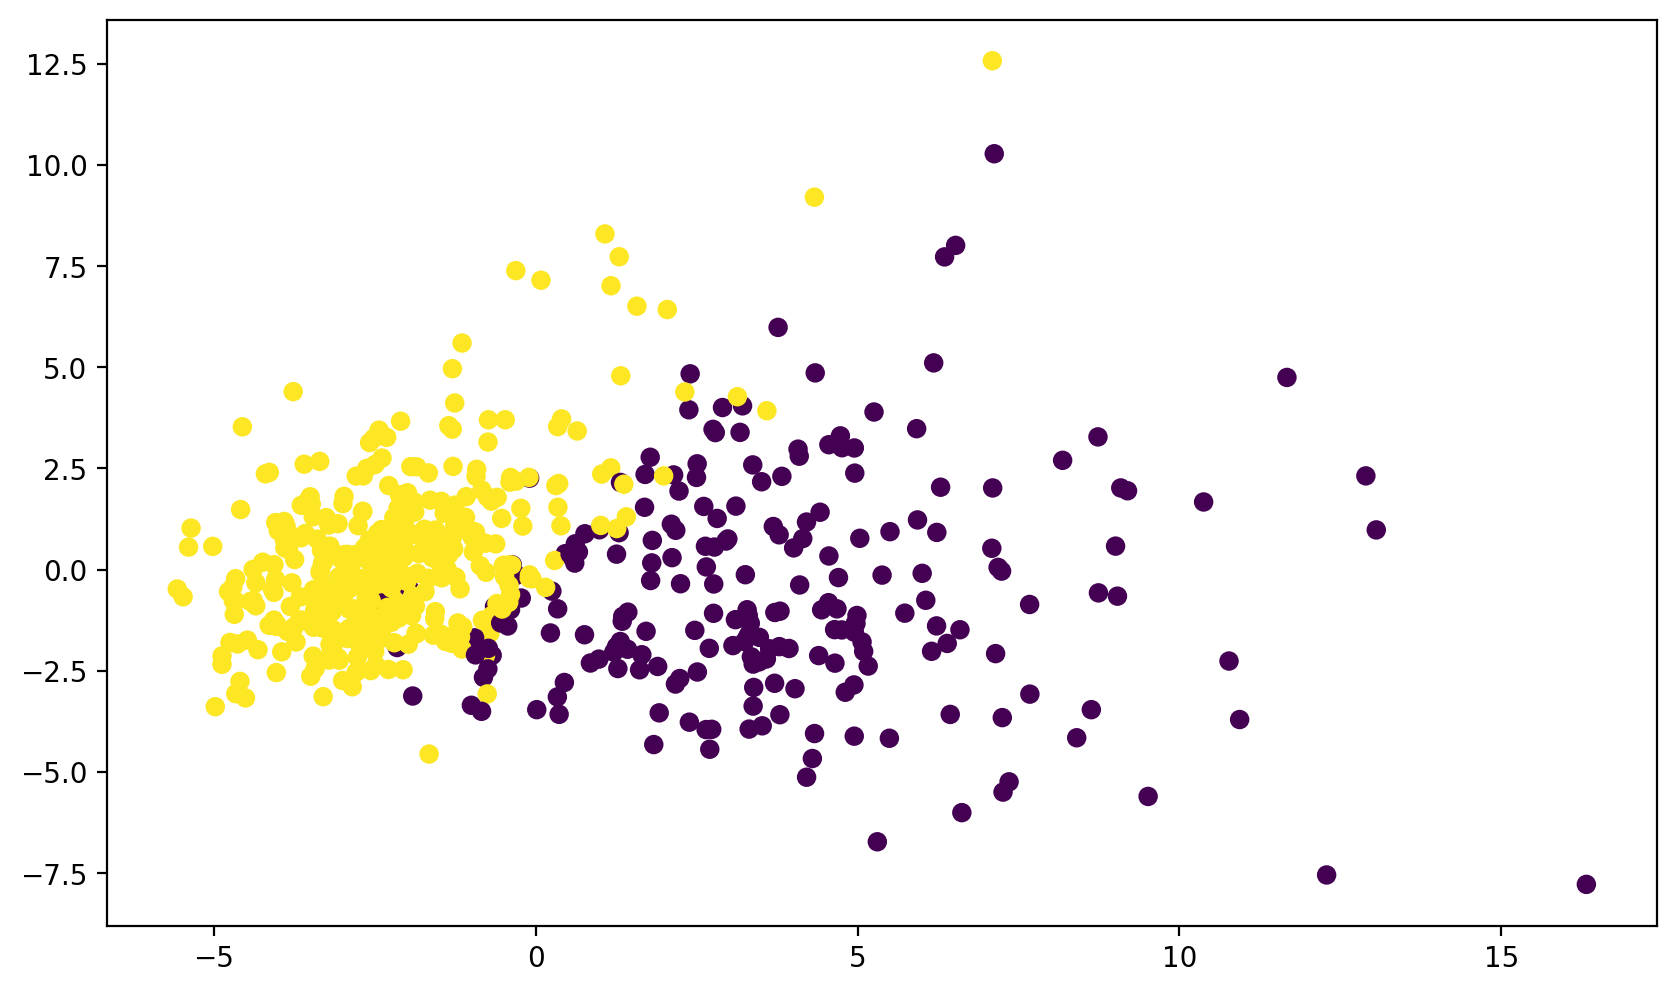

In [54]:
plt.figure(figsize=(10, 6), dpi=200)
# Bombs away...
plt.scatter(pc_results[:, 0], pc_results[:, 1], c=cancer_dict.target)

In [56]:
pca_model.components_ # 2 by 30 (directions of maximum variance in the data) 

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [60]:
df_comp = pd.DataFrame(pca_model.components_, index=['PC1', 'PC2'], columns=df.columns)

In [61]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<AxesSubplot:>

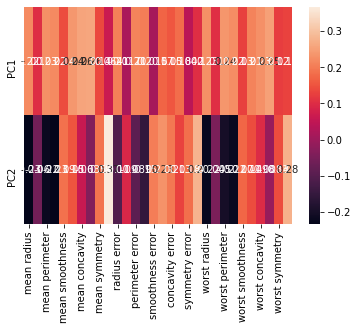

In [62]:
sns.heatmap(df_comp, annot=True)

In [63]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [69]:
np.sum(pca_model.explained_variance_ratio_)

0.6324320765155949

In [64]:
# First PCA explains 44% of variance, second explains 18%
# Two components are able to now explain 66% percent of variance in the data!

In [65]:
pca_30 = PCA(n_components=30)

In [66]:
pca_30.fit(scaled_X)

PCA(n_components=30)

In [68]:
np.sum(pca_30.explained_variance_ratio_)

1.0

In [70]:
exp_variance = []

for n in range(1, 30):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    exp_variance.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Variance explained')

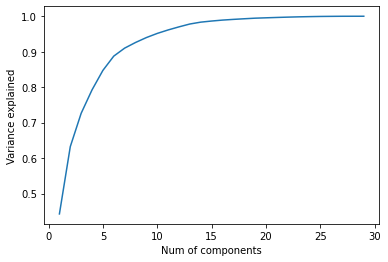

In [73]:
plt.plot(range(1, 30), exp_variance)
plt.xlabel('Num of components')
plt.ylabel('Variance explained')